In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier

df = pd.read_csv("train.csv")

In [2]:
df

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


## Анализ датафрейма

C:\Users\homer\AppData\Local\Temp\ipykernel_15488\2020088994.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Personality'] = df['Personality'].replace(person_replace)
C:\Users\homer\AppData\Local\Temp\ipykernel_15488\2020088994.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Stage_fear'] = df['Stage_fear'].replace(enother_replace)
C:\Users\homer\AppData\Local\Temp\ipykernel_15488\2020088994.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the ol

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,17334.000000,16631.000000,17344.000000,17058.000000,17375.000000,17470.000000,17260.000000,18524.000000
mean,3.137764,0.241838,5.265106,4.044319,0.233784,7.996737,4.982097,0.739527
std,3.003786,0.428209,2.753359,2.062580,0.423249,4.223484,2.879139,0.438905
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,3.000000,3.000000,0.000000,5.000000,3.000000,0.000000
50%,2.000000,0.000000,5.000000,4.000000,0.000000,8.000000,5.000000,1.000000
75%,4.000000,0.000000,8.000000,6.000000,0.000000,12.000000,7.000000,1.000000
max,11.000000,1.000000,10.000000,7.000000,1.000000,15.000000,10.000000,1.000000


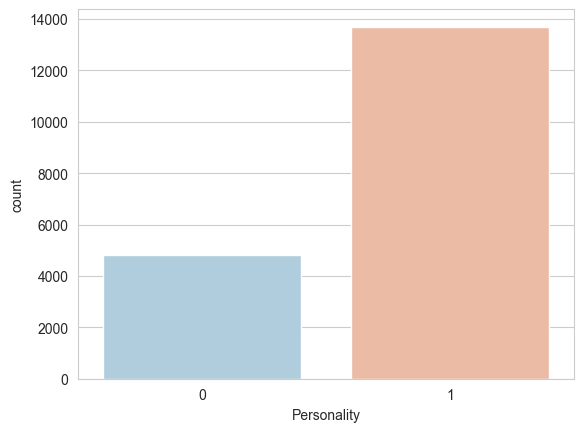

In [3]:
person_replace = {'Extrovert': 1, 
                  'Introvert': 0}

enother_replace = {'Yes': 1, 
                  'No': 0}
del df['id']
df['Personality'] = df['Personality'].replace(person_replace)
df['Stage_fear'] = df['Stage_fear'].replace(enother_replace)
df['Drained_after_socializing'] = df['Drained_after_socializing'].replace(enother_replace)

sns.set_style('whitegrid')
sns.countplot(x='Personality',data=df,palette='RdBu_r')

df.describe()

- В данных есть дисбаланс классо, ножно не забыть про взвешивание

In [4]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,0.0,6.0,4.0,0.0,15.0,5.0,1
1,1.0,0.0,7.0,3.0,0.0,10.0,8.0,1
2,6.0,1.0,1.0,0.0,NaN,3.0,0.0,0
3,3.0,0.0,7.0,3.0,0.0,11.0,5.0,1
4,1.0,0.0,4.0,4.0,0.0,13.0,NaN,1
...,...,...,...,...,...,...,...,...
18519,3.0,0.0,7.0,3.0,0.0,9.0,7.0,1
18520,1.0,NaN,6.0,7.0,0.0,6.0,5.0,1
18521,7.0,1.0,1.0,1.0,1.0,1.0,NaN,0
18522,NaN,1.0,1.0,0.0,1.0,5.0,2.0,0


In [140]:
df.isnull().sum()

Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

### <font color="#95b3d7">В данных много пропусков, но не понятна причина. Может есть зависимость, например интроверт отказываляся отвечать на часть вопросов.  
#### Нужно проверить влияние пропуска на класс. Мб стоит использовать оценку хи-квадрат
</font> 

- Проверка Time_spent_Alone

In [5]:
# расчет общего колличества
count = df.groupby([df['Time_spent_Alone'].isnull(), 'Personality']).size().unstack()
count

Personality,0,1
Time_spent_Alone,,
False,4544,12790
True,281,909


In [ ]:
# расчет долей
normalized_result = count.div(count.sum(axis=1), axis=0)

normalized_result * 100

Personality,0,1
Time_spent_Alone,,
False,26.214376,73.785624
True,23.613445,76.386555


<font color="#fac08f">Так как расхождение между true and false не велико, можно сделать вывод что нет влияния заполненности данного параметра на таргет => скорее всего это случайный пропуск => можно заменить значения на среднее или медиану.</font>

- Проверка Stage_fear

In [108]:
# расчет общего колличества
count = df.groupby([df['Stage_fear'].isnull(), 'Personality']).size().unstack()
count

Personality,0,1
Stage_fear,,
False,4081,12550
True,744,1149


In [109]:
# расчет долей
normalized_result = count.div(count.sum(axis=1), axis=0)

normalized_result * 100

Personality,0,1
Stage_fear,,
False,24.538512,75.461488
True,39.302694,60.697306


- Проверка Social_event_attendance

In [110]:
# расчет общего колличества
count = df.groupby([df['Social_event_attendance'].isnull(), 'Personality']).size().unstack()
print(count)

# расчет долей
normalized_result = count.div(count.sum(axis=1), axis=0)

print(normalized_result * 100)



Personality                 0      1
Social_event_attendance             
False                    4377  12967
True                      448    732
Personality                      0          1
Social_event_attendance                      
False                    25.236393  74.763607
True                     37.966102  62.033898


- Проверка Going_outside

In [111]:
# расчет общего колличества
count = df.groupby([df['Going_outside'].isnull(), 'Personality']).size().unstack()
print(count)

# расчет долей
normalized_result = count.div(count.sum(axis=1), axis=0)

print(normalized_result * 100)

Personality       0      1
Going_outside             
False          4321  12737
True            504    962
Personality            0          1
Going_outside                      
False          25.331223  74.668777
True           34.379263  65.620737


- Проверка Drained_after_socializing 

In [113]:
# расчет общего колличества
count = df.groupby([df['Drained_after_socializing'].isnull(), 'Personality']).size().unstack()
print(count)

# расчет долей
normalized_result = count.div(count.sum(axis=1), axis=0)

print(normalized_result * 100)

Personality                   0      1
Drained_after_socializing             
False                      4138  13237
True                        687    462
Personality                        0          1
Drained_after_socializing                      
False                      23.815827  76.184173
True                       59.791123  40.208877


- Проверка Friends_circle_size 

In [114]:
# расчет общего колличества
count = df.groupby([df['Friends_circle_size'].isnull(), 'Personality']).size().unstack()
print(count)

# расчет долей
normalized_result = count.div(count.sum(axis=1), axis=0)

print(normalized_result * 100)

Personality             0      1
Friends_circle_size             
False                4471  12999
True                  354    700
Personality                  0          1
Friends_circle_size                      
False                25.592444  74.407556
True                 33.586338  66.413662


- Проверка Post_frequency 

In [ ]:
# расчет общего колличества
count = df.groupby([df['Post_frequency'].isnull(), 'Personality']).size().unstack()
print(count)

# расчет долей
normalized_result = count.div(count.sum(axis=1), axis=0)
print(normalized_result * 100)

Personality        0      1
Post_frequency             
False           4338  12922
True             487    777
Personality             0          1
Post_frequency                      
False           25.133256  74.866744
True            38.528481  61.471519


#### Исходя из анализа, __Drained_after_socializing__ - класс Introvert чаще пропускают этот вопрос => Заменять это значние нельзя. Нужно обрабатывать по другому. Например просто метку как отдельную фичу, что этот попрос пропущен  
  
Тут вводятся 2 гипотезы:  
    - H0: Пропуски в Drained_after_socializing независият от Personality  
    - H1: Пропуски в Drained_after_socializing связаны с Personality. Интровер чаше пропустит данный вопрос намерено


In [145]:
from scipy.stats import chi2_contingency
count = df.groupby([df['Drained_after_socializing'].isnull(), 'Personality']).size().unstack()

# расчет долей
normalized_result = count.div(count.sum(axis=1), axis=0)

res = chi2_contingency(count)
f'{res.pvalue:.3f}'

'0.000'

### <font color="#fac08f">P-value < 0.05 => Отвергаем H0 гипотезу. Следовательно пропуски будут обрабатываться через метку.</font>

## Обработка пропусков  
Time_spent_Alone             1190 - замена на среднее  
Stage_fear                   1893 - замена на среднее  
Social_event_attendance      1180 - замена на среднее  
Going_outside                1466 - замена на среднее  
Drained_after_socializing    1149 - пропуски как новая метка  
Friends_circle_size          1054 - замена на среднее  
Post_frequency 

In [6]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,0.0,6.0,4.0,0.0,15.0,5.0,1
1,1.0,0.0,7.0,3.0,0.0,10.0,8.0,1
2,6.0,1.0,1.0,0.0,NaN,3.0,0.0,0
3,3.0,0.0,7.0,3.0,0.0,11.0,5.0,1
4,1.0,0.0,4.0,4.0,0.0,13.0,NaN,1
...,...,...,...,...,...,...,...,...
18519,3.0,0.0,7.0,3.0,0.0,9.0,7.0,1
18520,1.0,NaN,6.0,7.0,0.0,6.0,5.0,1
18521,7.0,1.0,1.0,1.0,1.0,1.0,NaN,0
18522,NaN,1.0,1.0,0.0,1.0,5.0,2.0,0


In [7]:
columns_to_fill = ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())

In [8]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.000000,0.000000,6.0,4.0,0.0,15.0,5.000000,1
1,1.000000,0.000000,7.0,3.0,0.0,10.0,8.000000,1
2,6.000000,1.000000,1.0,0.0,NaN,3.0,0.000000,0
3,3.000000,0.000000,7.0,3.0,0.0,11.0,5.000000,1
4,1.000000,0.000000,4.0,4.0,0.0,13.0,4.982097,1
...,...,...,...,...,...,...,...,...
18519,3.000000,0.000000,7.0,3.0,0.0,9.0,7.000000,1
18520,1.000000,0.241838,6.0,7.0,0.0,6.0,5.000000,1
18521,7.000000,1.000000,1.0,1.0,1.0,1.0,4.982097,0
18522,3.137764,1.000000,1.0,0.0,1.0,5.0,2.000000,0


In [9]:
# Создание новой категории из пропуска Drained_after_socializing
df['is_Drained_NaN'] = df['Drained_after_socializing'].isna().astype(int)

In [18]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,is_Drained_NaN
0,0.000000,0.000000,6.0,4.0,0.0,15.0,5.000000,1,0
1,1.000000,0.000000,7.0,3.0,0.0,10.0,8.000000,1,0
2,6.000000,1.000000,1.0,0.0,NaN,3.0,0.000000,0,1
3,3.000000,0.000000,7.0,3.0,0.0,11.0,5.000000,1,0
4,1.000000,0.000000,4.0,4.0,0.0,13.0,4.982097,1,0
...,...,...,...,...,...,...,...,...,...
18519,3.000000,0.000000,7.0,3.0,0.0,9.0,7.000000,1,0
18520,1.000000,0.241838,6.0,7.0,0.0,6.0,5.000000,1,0
18521,7.000000,1.000000,1.0,1.0,1.0,1.0,4.982097,0,0
18522,3.137764,1.000000,1.0,0.0,1.0,5.0,2.000000,0,0


In [11]:
df["Social_Load"] = df["Social_event_attendance"] / (df["Time_spent_Alone"] + 1)
df["Outdoor_Social"] = df["Going_outside"] * df["Social_event_attendance"]
df["Small_Friends_Circle"] = (df["Friends_circle_size"] < 3).astype(int)
df["Large_Friends_Circle"] = (df["Friends_circle_size"] > 15).astype(int)
df["Social_Burnout"] = df["Social_event_attendance"] * df["Drained_after_socializing"]
df["Posts_per_Friend"] = df["Post_frequency"] / (df["Friends_circle_size"] + 1)
df["Alone_Category"] = pd.cut(df["Time_spent_Alone"], bins=[-1,2,5,100], labels=["low","medium","high"])

In [18]:
df.describe()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,is_Drained_NaN,Social_Load,Outdoor_Social,Small_Friends_Circle,Large_Friends_Circle,Social_Burnout,Posts_per_Friend
count,18524.000000,18524.000000,18524.000000,18524.000000,17375.000000,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000,18524.0,17375.000000,18524.000000
mean,3.137764,0.241838,5.265106,4.044319,0.233784,7.996737,4.982097,0.739527,0.062028,2.386276,24.127302,0.107428,0.0,0.472887,0.621181
std,2.905696,0.405739,2.664215,1.979276,0.423249,4.101561,2.779168,0.438905,0.241212,2.225674,16.828353,0.309665,0.0,1.165148,0.477441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,0.000000,3.000000,3.000000,0.000000,5.000000,3.000000,0.000000,0.000000,0.725029,10.530212,0.000000,0.0,0.000000,0.333333
50%,3.000000,0.000000,5.265106,4.000000,0.000000,8.000000,5.000000,1.000000,0.000000,1.800000,24.000000,0.000000,0.0,0.000000,0.538462
75%,4.000000,0.241838,7.000000,6.000000,0.000000,11.000000,7.000000,1.000000,0.000000,3.000000,36.000000,0.000000,0.0,0.000000,0.800000
max,11.000000,1.000000,10.000000,7.000000,1.000000,15.000000,10.000000,1.000000,1.000000,10.000000,70.000000,1.000000,0.0,9.000000,6.000000


### Подготовка данных для обучения

In [13]:
X_train = df.drop('Personality', axis=1)
y_train = pd.DataFrame(df["Personality"])

In [15]:
model = CatBoostClassifier(verbose=0, allow_writing_files=False, cat_features=["Alone_Category"])
model.fit(X_train, y_train)

In [16]:
df_test = pd.read_csv("test.csv")
df_test

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0
...,...,...,...,...,...,...,...,...
6170,24694,3.0,No,5.0,5.0,No,9.0,6.0
6171,24695,8.0,Yes,2.0,1.0,Yes,0.0,0.0
6172,24696,2.0,No,4.0,3.0,No,9.0,7.0
6173,24697,3.0,No,4.0,4.0,No,11.0,9.0


In [ ]:
pred = model.predict()